Name: Bessa Tamarra
<br>Chosen Dataset: Heart Failure Clinical Records https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

<h2>Assignment 1</h2>
<br><p>
Instructions: 
<br>
Choose a dataset of your liking and perform the following:
Create a Correlation Plo

Check the distribution of each column and determine which probability distiribution it fis.

Create a summary statisics.

Perform a hypothesis test (Code from scratch).</p>

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

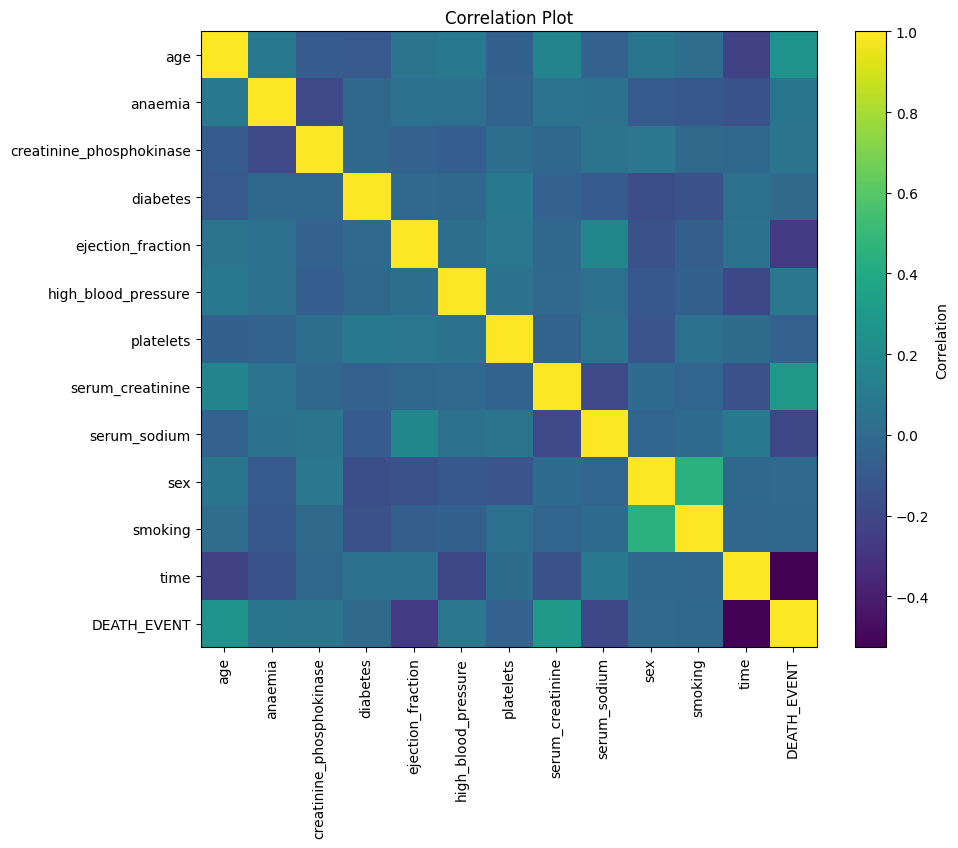

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv'

df = pd.read_csv(url)


print(df.head())  
print(df.info()) 


correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Correlation Plot')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

Error fitting Beta distribution to age: Invalid values in `data`.  Maximum likelihood estimation with 'beta' requires that 40.0 < (x - loc)/scale  < 95.0 for each x in `data`.


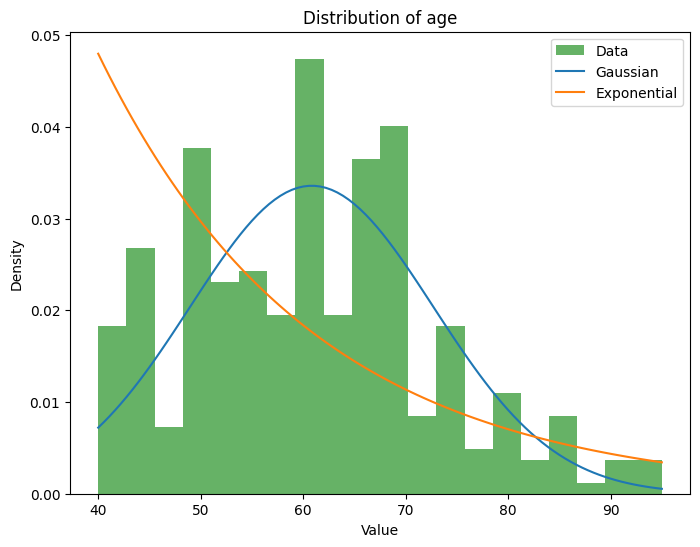

Error fitting Beta distribution to anaemia: Invalid values in `data`.  Maximum likelihood estimation with 'beta' requires that 0 < (x - loc)/scale  < 1 for each x in `data`.


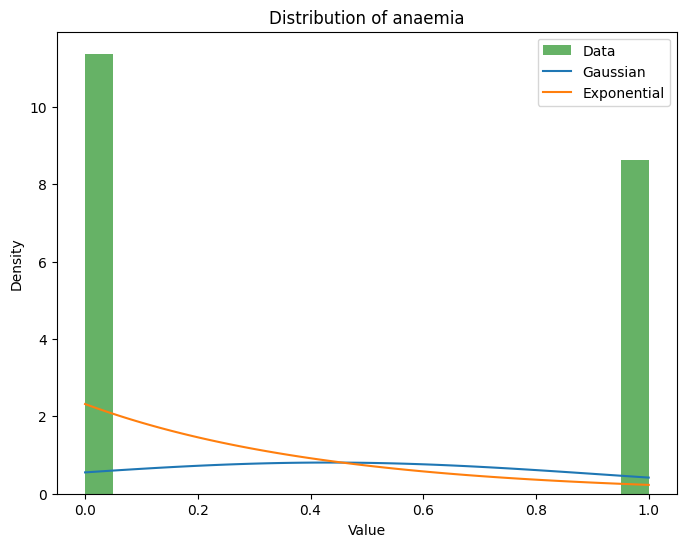

Error fitting Beta distribution to creatinine_phosphokinase: Invalid values in `data`.  Maximum likelihood estimation with 'beta' requires that 23 < (x - loc)/scale  < 7861 for each x in `data`.


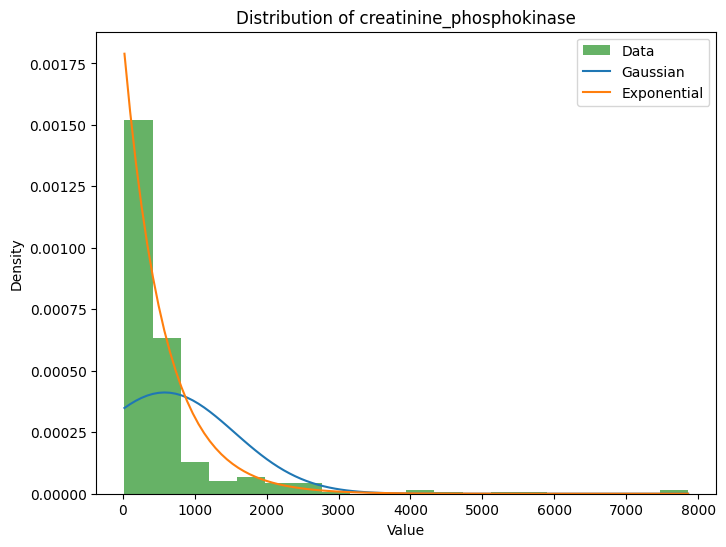

Error fitting Beta distribution to diabetes: Invalid values in `data`.  Maximum likelihood estimation with 'beta' requires that 0 < (x - loc)/scale  < 1 for each x in `data`.


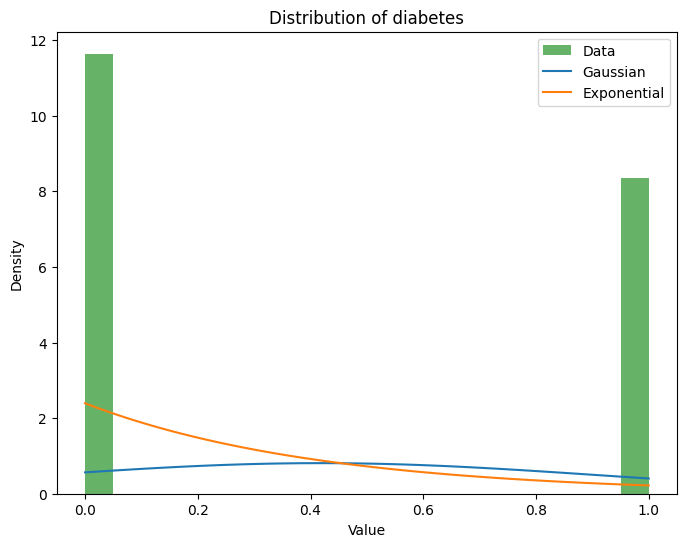

Error fitting Beta distribution to ejection_fraction: Invalid values in `data`.  Maximum likelihood estimation with 'beta' requires that 14 < (x - loc)/scale  < 80 for each x in `data`.


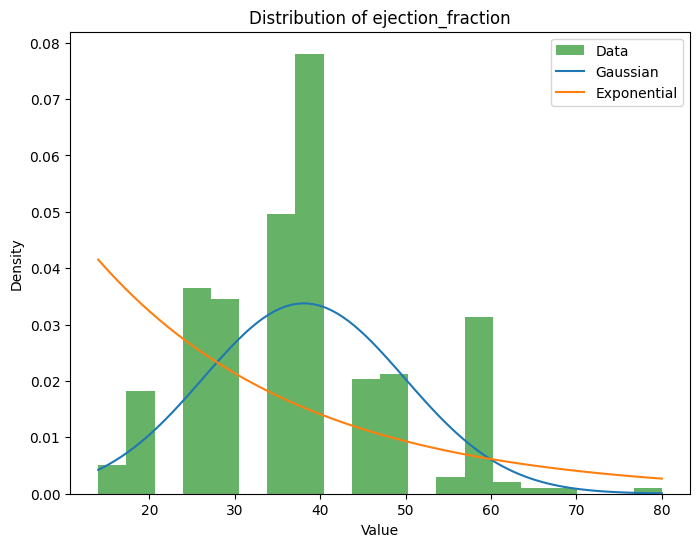

Error fitting Beta distribution to high_blood_pressure: Invalid values in `data`.  Maximum likelihood estimation with 'beta' requires that 0 < (x - loc)/scale  < 1 for each x in `data`.


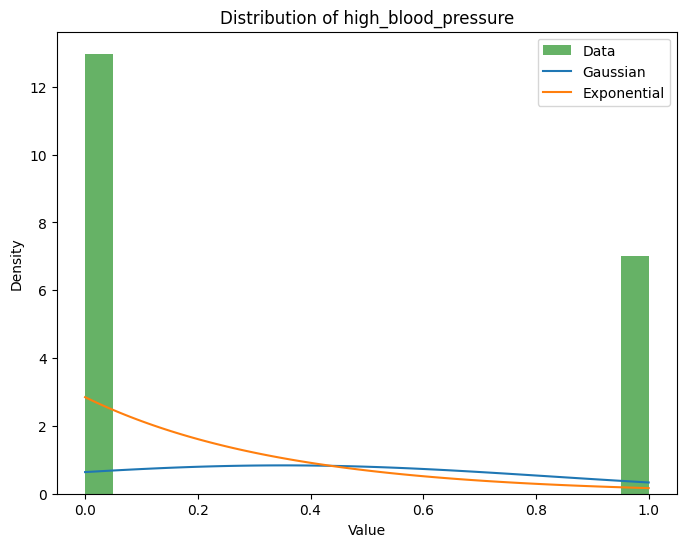

Error fitting Beta distribution to platelets: Invalid values in `data`.  Maximum likelihood estimation with 'beta' requires that 25100.0 < (x - loc)/scale  < 850000.0 for each x in `data`.


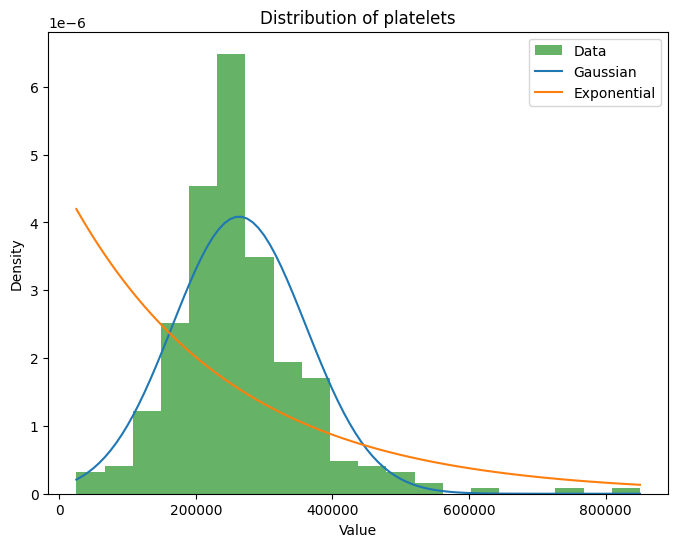

Error fitting Beta distribution to serum_creatinine: Invalid values in `data`.  Maximum likelihood estimation with 'beta' requires that 0.5 < (x - loc)/scale  < 9.4 for each x in `data`.


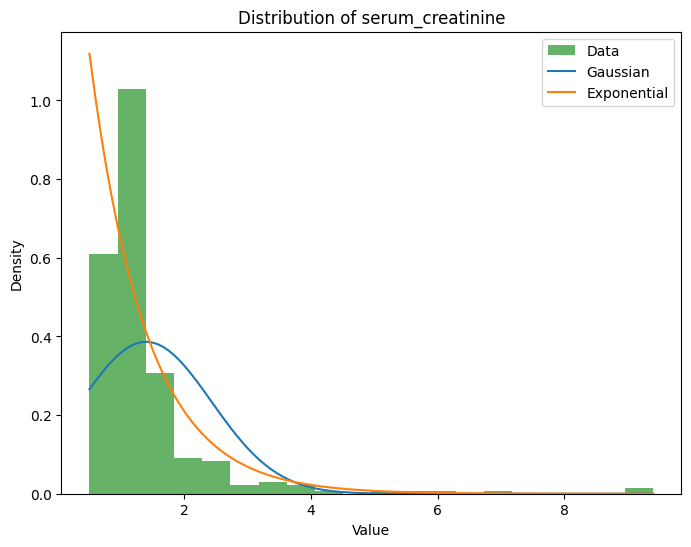

Error fitting Beta distribution to serum_sodium: Invalid values in `data`.  Maximum likelihood estimation with 'beta' requires that 113 < (x - loc)/scale  < 148 for each x in `data`.


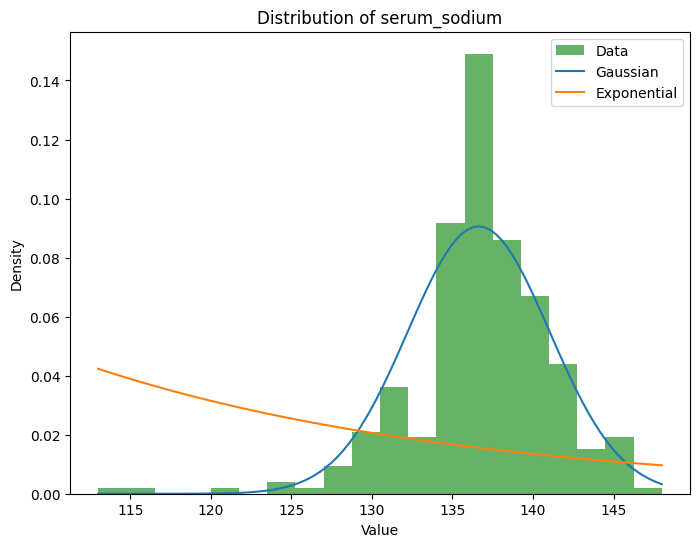

Error fitting Beta distribution to sex: Invalid values in `data`.  Maximum likelihood estimation with 'beta' requires that 0 < (x - loc)/scale  < 1 for each x in `data`.


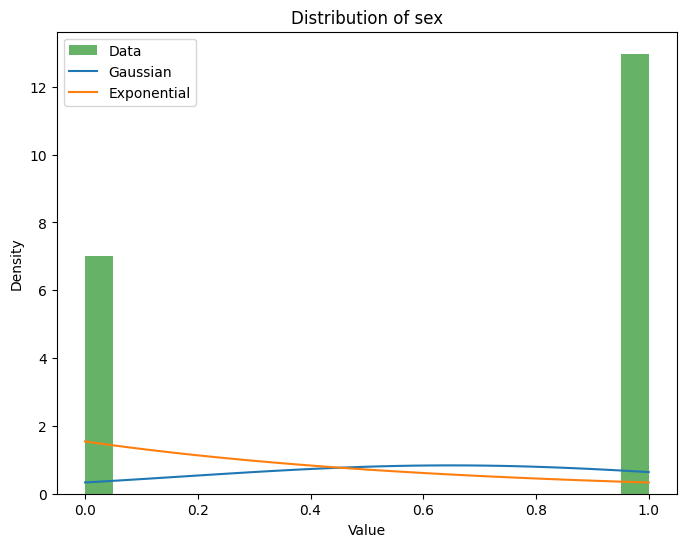

Error fitting Beta distribution to smoking: Invalid values in `data`.  Maximum likelihood estimation with 'beta' requires that 0 < (x - loc)/scale  < 1 for each x in `data`.


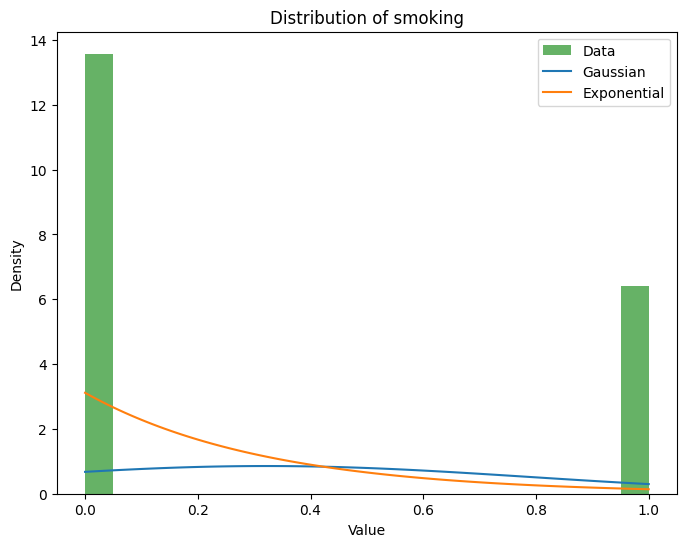

Error fitting Beta distribution to time: Invalid values in `data`.  Maximum likelihood estimation with 'beta' requires that 4 < (x - loc)/scale  < 285 for each x in `data`.


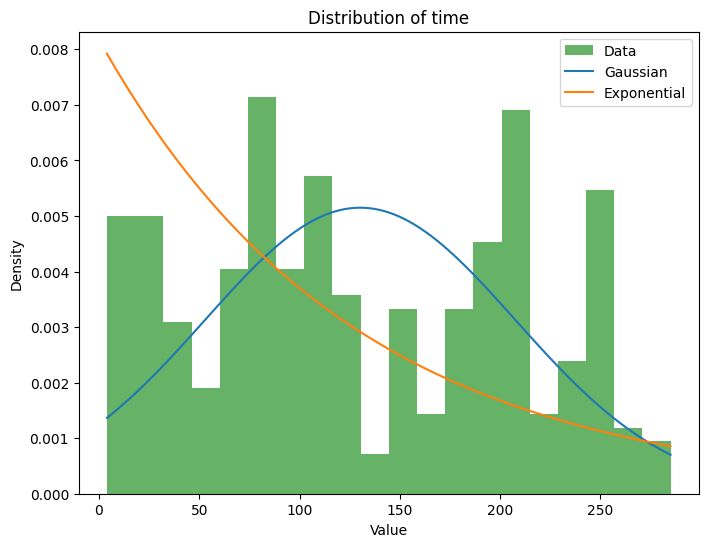

Error fitting Beta distribution to DEATH_EVENT: Invalid values in `data`.  Maximum likelihood estimation with 'beta' requires that 0 < (x - loc)/scale  < 1 for each x in `data`.


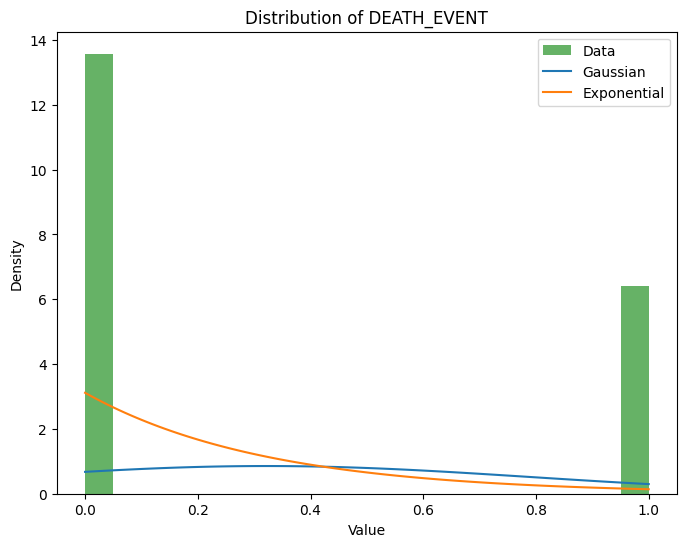

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import requests
from io import StringIO

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv'

response = requests.get(url)
data = StringIO(response.text)

df = pd.read_csv(data)

def plot_distributions(column):
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, density=True, alpha=0.6, color='g', label='Data')

    # Fit and plot Gaussian distribution
    try:
        params_norm = stats.norm.fit(df[column].dropna())
        pdf_values_norm = stats.norm.pdf(np.linspace(df[column].min(), df[column].max(), 100), *params_norm)
        plt.plot(np.linspace(df[column].min(), df[column].max(), 100), pdf_values_norm, label='Gaussian')
    except Exception as e:
        print(f"Error fitting Gaussian distribution to {column}: {e}")

    # Fit and plot Exponential distribution
    try:
        params_expon = stats.expon.fit(df[column].dropna())
        pdf_values_expon = stats.expon.pdf(np.linspace(df[column].min(), df[column].max(), 100), *params_expon)
        plt.plot(np.linspace(df[column].min(), df[column].max(), 100), pdf_values_expon, label='Exponential')
    except Exception as e:
        print(f"Error fitting Exponential distribution to {column}: {e}")

    # Fit and plot Beta distribution (scaled to data range)
    try:
        data_min, data_max = df[column].min(), df[column].max()
        params_beta = stats.beta.fit(df[column].dropna(), floc=data_min, fscale=data_max - data_min)
        pdf_values_beta = stats.beta.pdf(np.linspace(data_min, data_max, 100), *params_beta)
        plt.plot(np.linspace(data_min, data_max, 100), pdf_values_beta, label='Beta')
    except Exception as e:
        print(f"Error fitting Beta distribution to {column}: {e}")

    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Loop through each column and plot distributions
for col in df.columns:
    plot_distributions(col)


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import requests
from io import StringIO

# URL to the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv'

# Fetch the dataset
response = requests.get(url)
data = StringIO(response.text)

# Load the dataset into a DataFrame
df = pd.read_csv(data)

# Function to find the best fit distribution for data
def get_best_fit_distribution(data):
    distributions = [
        ('Normal', stats.norm),
        ('Exponential', stats.expon),
        ('Beta', stats.beta)
    ]
    
    best_distribution = None
    best_params = None
    best_sse = np.inf  # Initialize with infinity
    
    # Histogram of the data for SSE calculation
    y, x = np.histogram(data, bins=30, density=True)
    x_mid = (x[:-1] + x[1:]) / 2  # Calculate bin centers
    
    # Iterate over each distribution
    for dist_name, dist in distributions:
        try:
            # Fit the distribution to the data
            params = dist.fit(data)
            
            # Create a PDF with the fitted parameters
            arg = params[:-2]
            loc = params[-2]
            scale = params[-1]
            if dist_name == 'Beta':
                pdf = dist.pdf(x_mid, *arg, loc=loc, scale=scale)
            else:
                pdf = dist.pdf(x_mid, loc=loc, scale=scale, *arg)
            
            # Calculate the sum of squared errors (SSE)
            sse = np.sum((y - pdf) ** 2)
            
            # Identify the best fit distribution
            if sse < best_sse:
                best_distribution = dist_name
                best_params = params
                best_sse = sse
        except Exception as e:
            print(f"Error fitting {dist_name} distribution: {e}")
            
    return best_distribution, best_params

# Loop through each column and determine the best fit distribution
for col in df.columns:
    data = df[col].dropna().astype(float)
    
    best_distribution, best_params = get_best_fit_distribution(data)
    
    print(f'Column: {col}, Best Fit Distribution: {best_distribution}, Parameters: {best_params}')


Column: age, Best Fit Distribution: Beta, Parameters: (1.8813817348541781, 3.5718621448973136, 38.500703953718144, 64.58493018857848)
Column: anaemia, Best Fit Distribution: Beta, Parameters: (1.6693591759712985, 0.4805910426289298, -0.3648011791509286, 1.364801179150929)
Column: creatinine_phosphokinase, Best Fit Distribution: Beta, Parameters: (0.8082352377183892, 84.15937025464562, 22.999999999999996, 57793.92487626051)
Error fitting Beta distribution: Optimization converged to parameters that are outside the range allowed by the distribution.
Column: diabetes, Best Fit Distribution: Exponential, Parameters: (0.0, 0.4180602006688963)
Column: ejection_fraction, Best Fit Distribution: Beta, Parameters: (4.0656060861390655, 12.159297357655184, 9.763237282743297, 113.0307397308774)
Column: high_blood_pressure, Best Fit Distribution: Beta, Parameters: (1.591567285610339, 0.21518932549495448, -0.7349999235235865, 1.7349999235235867)
Column: platelets, Best Fit Distribution: Beta, Paramete

C:\Users\bessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\bessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\bessa\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_optimize.py:917: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


Column: serum_sodium, Best Fit Distribution: Normal, Parameters: (136.62541806020067, 4.405092379513557)
Column: sex, Best Fit Distribution: Beta, Parameters: (0.07587658554261287, 0.14338963939631338, -0.3316184534997681, 1.3316184534997684)
Column: smoking, Best Fit Distribution: Exponential, Parameters: (0.0, 0.3210702341137124)
Column: time, Best Fit Distribution: Beta, Parameters: (0.9843517675076936, 1.246540405188441, 3.9999999999999996, 281.50549864262024)
Column: DEATH_EVENT, Best Fit Distribution: Exponential, Parameters: (0.0, 0.3210702341137124)


In [2]:
import pandas as pd
import requests
from io import StringIO

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv'

response = requests.get(url)
data = StringIO(response.text)

df = pd.read_csv(data)

summary_stats = df.describe()

print(summary_stats)


              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

In [1]:
import requests
from io import StringIO

# calculate the mean of a list of values
def mean(values):
    return sum(values) / len(values)

# calculate the variance of a list of values
def variance(values):
    mu = mean(values)
    return sum((x - mu) ** 2 for x in values) / (len(values) - 1)

# calculate the t-statistic for independent samples
def independent_t_test(sample1, sample2):
    # Check if samples are empty
    if not sample1 or not sample2:
        return None  
    
    # means of the samples
    mean1 = mean(sample1)
    mean2 = mean(sample2)

    # variances of the samples
    var1 = variance(sample1)
    var2 = variance(sample2)

    # Calculate the pooled standard error
    n1 = len(sample1)
    n2 = len(sample2)
    se = ((var1 / n1) + (var2 / n2)) ** 0.5

    # t-statistic
    t_statistic = (mean1 - mean2) / se

    return t_statistic


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv'


response = requests.get(url)
data = StringIO(response.text)


rows = [line.strip().split(',') for line in data]


header = rows[0]
age_index = header.index('age')
diabetes_index = header.index('diabetes')


sample1 = [float(row[age_index]) for row in rows[1:] if row[diabetes_index] == '0']  # 'age' for non-diabetic individuals
sample2 = [float(row[age_index]) for row in rows[1:] if row[diabetes_index] == '1']  # 'age' for diabetic individuals


t_statistic = independent_t_test(sample1, sample2)


if t_statistic is not None:
    print("t-statistic:", t_statistic)
    
    if abs(t_statistic) >= 2:  # threshold for significance
        print("The difference in mean ages between non-diabetic and diabetic individuals is statistically significant.")
    else:
        print("There is not enough evidence to conclude a significant difference in mean ages between non-diabetic and diabetic individuals.")
else:
    print("One or both of the samples is empty.")
    
    


t-statistic: 1.804492817987751
There is not enough evidence to conclude a significant difference in mean ages between non-diabetic and diabetic individuals.
